# Digital Image Processing Term Project

Student 1: Ameed Othman عميد عثمان - 12220692

Student 2: Yahya Musmar يحيى مسمار - 122

We both study computer science and are registered in the Sun-Tue 12:30 Dr. Fadi's class.

Part 1: Design and implement a complete pipeline that loads a real-world input image of your choice, applies various digital image processing techniques, and produces a report along with annotated results, according to the following instructions:

- Input image: Take a photo of any object using your own camera (or smartphone). Embed your name and student ID as a visible watermark in a random location within the image.
- Tasks:
     - Load the image in grayscale
     - Display its dimensions, color channels, and pixel value statistics (mean, min, max, etc.).
     - Modify the brightness of the grayscale image by applying the following equation
        ```math
            s = c*r
        ```
    - where:
        - s is the output gray level
        - r is the input gray level
        - c is a random value where 0.4<c<2.0
    - Analyze the brightness of the resulting image by plotting and discussing its histogram.
    - Apply one or more suitable techniques to correct the brightness of the resulting image. Provide justification for your selected methods. Also, plot the histograms of the original and corrected images for comparison.
    - Write a function to add salt-and-pepper noise by randomly changing the values of some pixels to black or white.
    - Reduce the noise using both mean filter and median filter. Then, apply any additional filters necessary to correct artifacts that may result after noise reduction (e.g., sharpening filters). Compare the performance and visual outcomes of both filtering methods.
- Deliverables
    - Source code
    - Original input image
    - Output images showing intermediate and final results
    - Report (PDF):
        - Explanation of each step
        - Screenshots of outputs
        - A summary of challenges faced and justification for the techniques used, explaining why certain filters or transformations were chosen

In [46]:
import cv2
import random
import matplotlib.pyplot as plt
import numpy as np

## Loading image and adding our watermarks
We will use a photo of my bike taken in the abandoned military airport in Frankfurt am Main.

In [22]:
# this function will add our watermarks in a random place in the image
def add_watermark(image, text):
    # we will create a copy of the image to preserve the original one
    watermarked_image = image.copy()
    height, width = image.shape[:2]
    x = random.randint(10, width-200)
    y = random.randint(10, height-20)
    cv2.putText(watermarked_image, text, (x,y), cv2.FONT_HERSHEY_SIMPLEX, 
                1.5, (255, 255, 255), 5, cv2.LINE_AA)
    return watermarked_image

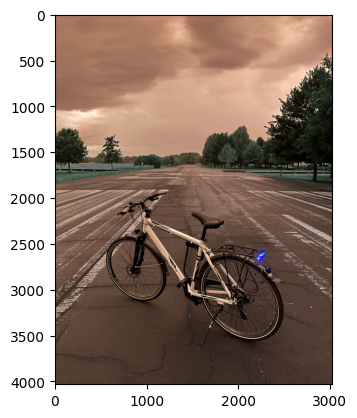

In [23]:
original_img = cv2.imread("my_bike.jpg")
plt.imshow(original_img)

In [49]:
watermarked_image = add_watermark(original_img, "Ameed Othman - 12220692")
watermarked_image = add_watermark(watermarked_image, "Yahya Musmar - 122")

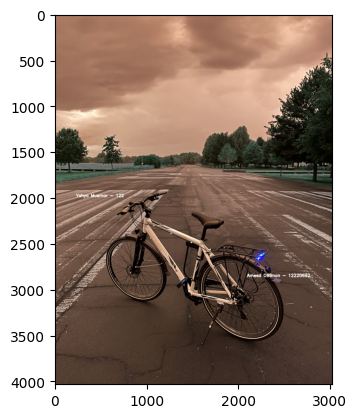

In [50]:
plt.imshow(watermarked_image)

now we will save the watermarked image

In [51]:
cv2.imwrite("watermarked_image.jpg", watermarked_image)

True

## Loading watermarked image in gray scale and exploring its values

In [52]:
# load watermarked image in grayscale
gray_image = cv2.imread("watermarked_image.jpg", cv2.IMREAD_GRAYSCALE)

In [53]:
gray_image.shape

(4032, 3024)

In [54]:
height, width = gray_image.shape
print(f"Image dimensions are: {width} x {height}")
print(f"Number of channels is 1 (grayscale)")

Image dimensions are: 3024 x 4032
Number of channels is 1 (grayscale)


In [55]:
# we will calculate the pixel value statistics
min_val = np.min(gray_image)
max_val = np.max(gray_image)
mean_val = np.mean(gray_image)
std_val = np.std(gray_image)

In [56]:
print(f"Max pixel value: {max_val}")
print(f"Min pixel value: {min_val}")
print(f"Mean pixel value: {mean_val:.2f}")
print(f"Standard deviation: {std_val:.2f}")

Max pixel value: 255
Min pixel value: 0
Mean pixel value: 91.15
Standard deviation: 51.22
